<font color="navy">
# Text Processing
(1) Clean up and tokenize body text
<br>
(2) Clean up title text
<br>
(3) Made new data frame
<br>
(4) Absolute Frequency Vectorization
<br>
(5) More Stop Word Removal

In [124]:
# LIBRARIES
# TEXT PROCESSING
import nltk
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# DATA SCIENCE
import pandas as pd
import numpy as np

# VISUALIZATION
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

# ELSE
from collections import Counter
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [125]:
# READ IN DATA
petnlp = pd.DataFrame.from_csv("petnlp.csv")
petnlp.head()

,body,issues,petition_type,title,url,ideology
0,It effects every American in some way. It wil...,"Budget & Taxes, Economy & Jobs, Veterans & Mil...",Change an existing Administration policy,Legalize Marijuana and bring jobs to millions ...,https://petitions.whitehouse.gov/petition/lega...,Liberal
1,"""In the dying days of the Ottoman Empire, unde...","Civil Rights & Equality, Government & Regulato...",Take or explain a position on an issue or policy,Officially Recognize The Armenian Genocide Of ...,https://petitions.whitehouse.gov/petition/offi...,Neutral
2,Walleye are political pawns at Mille Lacs Lake...,"Civil Rights & Equality, Economy & Jobs, Gover...",Change an existing Administration policy,Eliminate Mille Lacs Lake Treaty Management,https://petitions.whitehouse.gov/petition/elim...,Neutral
3,We cannot make America great with so many disa...,"Economy & Jobs, Health Care, Technology & Inno...",Propose a new Administration policy,Take Action to End the Autism Epidemic and Imp...,https://petitions.whitehouse.gov/petition/take...,Conservative
4,Locked up by US Government for 10 Years \r\nIN...,Criminal Justice Reform,Take or explain a position on an issue or policy,Release Kevin Trudeau,https://petitions.whitehouse.gov/petition/rele...,Neutral


<font color="navy">
## (1) Text Clean-Up and Tokenization
We will clean up body text.

In [126]:
# FUNCTION TO CLEAN UP BODY TEXT
def cleanUpText(text, additional_stopwords=[]):
    # REMOVE MARK UP
    new_text = text.replace("\r", "").replace("\n", "")
    
    # REMOVE URLS
    new_text = re.sub(r"\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*", "", new_text).strip()
    
    # REMOVE PUNCTUATION
    new_text = new_text.translate(None, string.punctuation)
    
    # REMOVE NUMBERS
    new_text = re.sub(r"\d+", "", new_text)
    
    # LOWERCASE
    new_text = new_text.lower()
    
    #SPLIT
    new_text = new_text.split()
    
    # REMOVE STOPWORDS
    stops = stopwords.words("english") + additional_stopwords
    
    return [word for word in new_text if word not in stops]

In [127]:
# stopwords.words("english")

# new_stops = "President, president, people, without, needs, since, used, get, would, us, united, states, people, american, americans, national, government, petition, make, also, many, must, need, change, ask, use, every, trump, white, house, america, America, executive, Executive"
# new_stops = new_stops.split(", ")

# new_stops+stopwords.words("english")

In [128]:
tokens = [cleanUpText(x) for x in petnlp["body"]]
print tokens[0]

/Users/EDIE/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


['effects', 'every', 'american', 'way', 'also', 'keep', 'americans', 'funding', 'terrorism', 'drug', 'cartels', 'would', 'bring', 'jobs', 'following', 'industries', 'energy', 'farming', 'housing', 'industrial', 'manufacturing', 'healthcare', 'bring', 'much', 'needed', 'tax', 'dollars', 'fuel', 'military', 'provide', 'better', 'body', 'armor', 'troops', 'fuel', 'america', 'surplus', 'foreign', 'export']


<font color="navy">
## (2) Clean Up Title Text

In [129]:
# FUNCTION TO CLEAN UP BODY TEXT
def cleanUpTitle(text):
    # REMOVE MARK UP
    new_text = text.replace("\r", "").replace("\n", "")
    
    # REMOVE NUMBERS
    new_text = re.sub(r"\d+", "", new_text)
    
    # LOWERCASE
    new_text = new_text.lower()
    
    return(new_text)

In [130]:
cleaned_titles = [cleanUpTitle(x) for x in petnlp["title"]]

In [131]:
cleaned_titles[0:5]

['legalize marijuana and bring jobs to millions of americans.',
 'officially recognize the armenian genocide of ',
 'eliminate mille lacs lake treaty management',
 'take action to end the autism epidemic and implement comprehensive reforms of vaccine safety policies',
 'release kevin trudeau']

<font color="navy">
## (3) New Data Frame
I don't know.

In [132]:
blobs = [unicode(" ".join(x), errors="replace") for x in tokens]

In [133]:
blobs_df = pd.DataFrame({"title":cleaned_titles, "blobs":blobs, "ideology":petnlp["ideology"]})
blobs_df.head()

,blobs,ideology,title
0,effects every american way also keep americans...,Liberal,legalize marijuana and bring jobs to millions ...
1,dying days ottoman empire cover world war youn...,Neutral,officially recognize the armenian genocide of
2,walleye political pawns mille lacs lakewhile n...,Neutral,eliminate mille lacs lake treaty management
3,cannot make america great many disabled autist...,Conservative,take action to end the autism epidemic and imp...
4,locked us government years prison exercising c...,Neutral,release kevin trudeau


In [134]:
index = blobs_df["ideology"].index[blobs_df["ideology"].apply(pd.isnull)]
index

Int64Index([41], dtype='int64')

In [135]:
print blobs_df["ideology"][41]
print blobs_df["title"][41]
print blobs_df["blobs"][41]

nan
i have evidence of traffic enforcement devices being used unlawfully and in some cases illegally which must be addressed
research amp investigations amp petitions wwwbentcopbiz amp wwwbentcopboardsnet found extensive national global misuse traffic enforcement devices us uk australia likely globally majority hand held devices originate us endorsed us government require matter fully investigating openly amp honestly issues presented unlawfull road markings signage illegal prosecutions inaccuracy misuse hand held speed measuring devices requires open debate discussion dislosure public websites compiled much evidence believe respective governments collaborated use deployment strategies drivers


In [136]:
blobs_df.drop(41, inplace=True)

In [137]:
index = blobs_df["ideology"].index[blobs_df["ideology"].apply(pd.isnull)]
index

Int64Index([], dtype='int64')

In [166]:
blobs_df = blobs_df.reindex(range(len(blobs_df)))

<font color="navy">
## (4) Absolute Frequency Vectorization
Absolute frequencies of words per ideology.

In [167]:
neutral_blobs = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Neutral"]["blobs"]])
neutral_counts = Counter(neutral_blobs.split())
neutral_counts.most_common()[0:20]

[(u'us', 21),
 (u'president', 19),
 (u'people', 19),
 (u'states', 18),
 (u'new', 14),
 (u'united', 14),
 (u'military', 12),
 (u'congress', 12),
 (u'government', 12),
 (u'make', 11),
 (u'help', 11),
 (u'petition', 10),
 (u'state', 10),
 (u'law', 9),
 (u'trump', 9),
 (u'federal', 9),
 (u'get', 9),
 (u'many', 9),
 (u'american', 9),
 (u'pr', 9)]

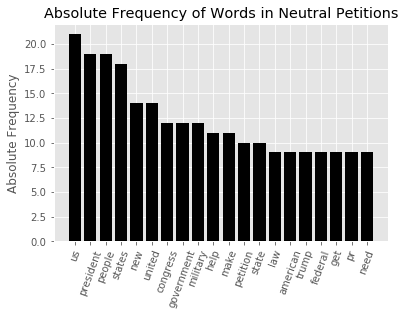

In [168]:
df = pd.DataFrame.from_dict(neutral_counts, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

# PLOTTING
plt.bar(word_indices, count, color="black")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Neutral Petitions")
    
plt.show()

In [169]:
liberal_blobs = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Liberal"]["blobs"]])
liberal_counts = Counter(liberal_blobs.split())
liberal_counts.most_common()[0:20]

[(u'president', 76),
 (u'people', 66),
 (u'us', 62),
 (u'trump', 61),
 (u'states', 56),
 (u'order', 46),
 (u'united', 46),
 (u'american', 44),
 (u'national', 39),
 (u'executive', 37),
 (u'rights', 33),
 (u'country', 33),
 (u'americans', 32),
 (u'climate', 32),
 (u'would', 30),
 (u'administration', 29),
 (u'change', 28),
 (u'public', 26),
 (u'donald', 24),
 (u'petition', 24)]

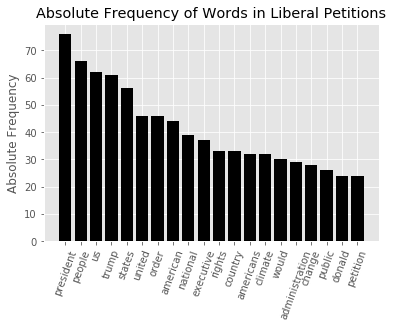

In [170]:
df = pd.DataFrame.from_dict(liberal_counts, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

## PLOTTING
plt.bar(word_indices, count, color="black")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Liberal Petitions")
    
plt.show()

In [171]:
conservative_blobs = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Conservative"]["blobs"]])
conservative_counts = Counter(conservative_blobs.split())
conservative_counts.most_common()[0:20]

[(u'us', 50),
 (u'people', 39),
 (u'president', 34),
 (u'law', 34),
 (u'states', 33),
 (u'trump', 27),
 (u'state', 27),
 (u'united', 26),
 (u'government', 22),
 (u'amendment', 21),
 (u'citizens', 20),
 (u'firearms', 20),
 (u'petition', 19),
 (u'national', 19),
 (u'would', 17),
 (u'american', 17),
 (u'rights', 16),
 (u'police', 16),
 (u'time', 15),
 (u'years', 15)]

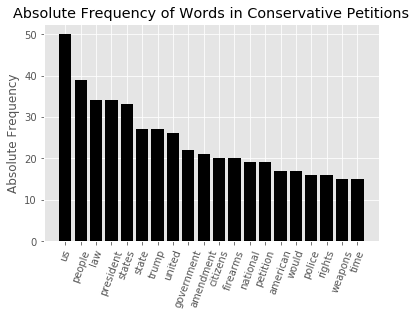

In [172]:
df = pd.DataFrame.from_dict(conservative_counts, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

## PLOTTING
plt.bar(word_indices, count, color="black")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Conservative Petitions")
    
plt.show()

<font color="navy">
## (5) Need to Remove Most Popular Words
We don't want them to all have the same top words.

In [173]:
all_blobs = " ".join([x for x in blobs_df["blobs"]])
all_counts = Counter(all_blobs.split())
# all_counts.most_common()[0:50]

TypeError: sequence item 41: expected string or Unicode, float found

<font color="navy">
I need to make an informed decision on more stop words. I feel strongly that these words do not need to be included in our corpus.
<br>
<br>
<b>New Additions:</b> us, people, american, national, government, petition, make, also, many, must, need, change, ask, use

In [174]:
new_stops = '''
            President, president, people, without, needs, since, used, get, would, us, united, states, 
            people, american, americans, national, government, petition, make, also, 
            many, must, need, change, ask, use, every, trump, white, house, america, America,
            executive, Executive
            '''
new_stops = new_stops.split(", ")

In [175]:
def removeStopWords(text):
    return [word for word in text.split() if word not in new_stops]

In [176]:
new_blobs = [" ".join(removeStopWords(x)) for x in blobs_df["blobs"]]

AttributeError: 'float' object has no attribute 'split'

In [177]:
new_blobs

[u'effects way keep funding terrorism drug cartels bring jobs following industries energy farming housing industrial manufacturing healthcare bring much needed tax dollars fuel military provide better body armor troops fuel surplus foreign export',
 u'dying days ottoman empire cover world war young turk embarked racist strategy xturkificationx multiethnic multireligious empire oneandonehalf million armenians murdered armenian genocide survivors exiled yearold homeland like officially recognize armenian genocide genocide shown recognition former obama promised acknowledge genocide failed',
 u'walleye political pawns mille lacs lakewhile natives nonnatives battle reservation boundaries mille lacs lake treaty management lakes resources become quagmire democratic led state department natural resource officials say hands tied mille lacs band officials screaming xfoulx turn result supreme court ruling treaty seven tries ojibwe sought walleye become game piece struggle retain jurisdiction sou

In [178]:
blobs_df["new_blobs"] = new_blobs
blobs_df.head()

,blobs,ideology,title,new_blobs
0,effects every american way also keep americans...,Liberal,legalize marijuana and bring jobs to millions ...,effects way keep funding terrorism drug cartel...
1,dying days ottoman empire cover world war youn...,Neutral,officially recognize the armenian genocide of,dying days ottoman empire cover world war youn...
2,walleye political pawns mille lacs lakewhile n...,Neutral,eliminate mille lacs lake treaty management,walleye political pawns mille lacs lakewhile n...
3,cannot make america great many disabled autist...,Conservative,take action to end the autism epidemic and imp...,cannot great many disabled autistic children u...
4,locked us government years prison exercising c...,Neutral,release kevin trudeau,locked years prison exercising constitutional ...


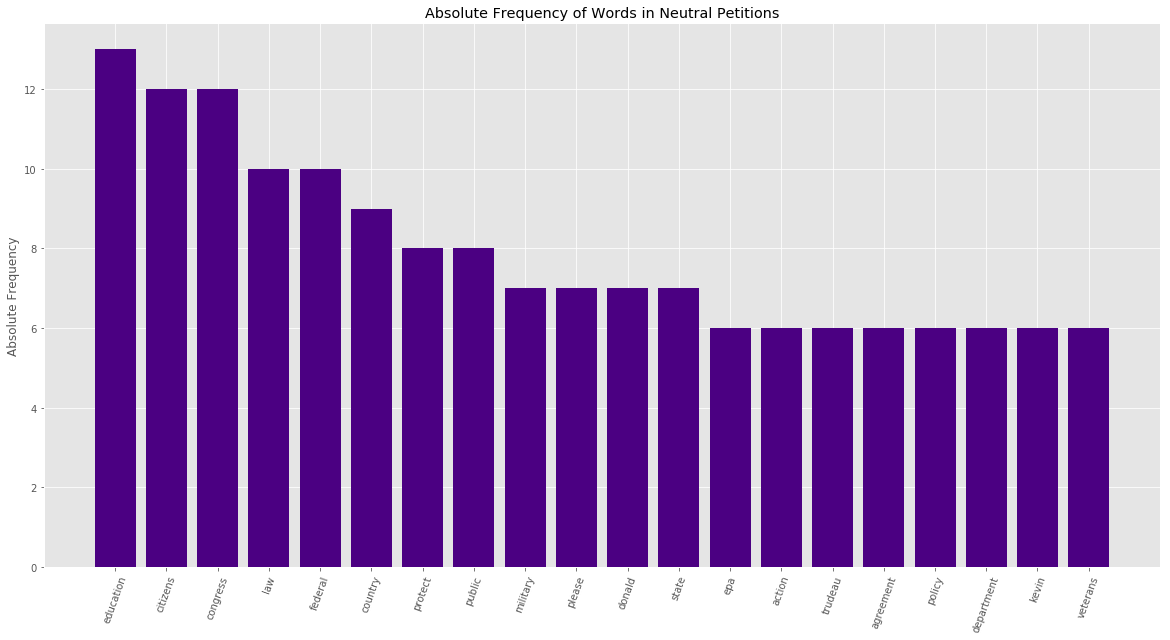

In [179]:
# NEUTRAL WORDS
neutral_blobs2 = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Neutral"]["new_blobs"]])
neutral_counts2 = Counter(neutral_blobs2.split())
neutral_counts2.most_common()[0:20]

df = pd.DataFrame.from_dict(neutral_counts2, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

# PLOTTING
plt.figure(figsize=(20,10))
plt.bar(word_indices, count, color="indigo")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Neutral Petitions")
    
plt.show()

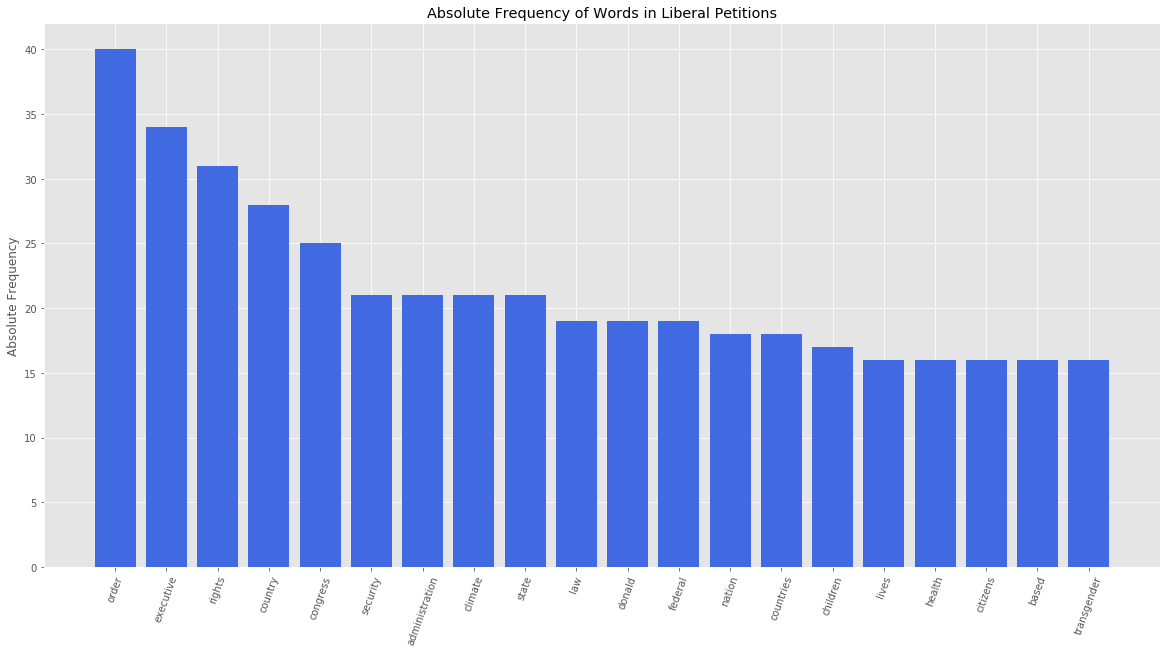

In [180]:
# LIBERAL WORDS
liberal_blobs2 = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Liberal"]["new_blobs"]])
liberal_counts2 = Counter(liberal_blobs2.split())
liberal_counts2.most_common()[0:20]

df = pd.DataFrame.from_dict(liberal_counts2, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

# PLOTTING
plt.figure(figsize=(20,10))
plt.bar(word_indices, count, color="royalblue")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Liberal Petitions")
    
plt.show()

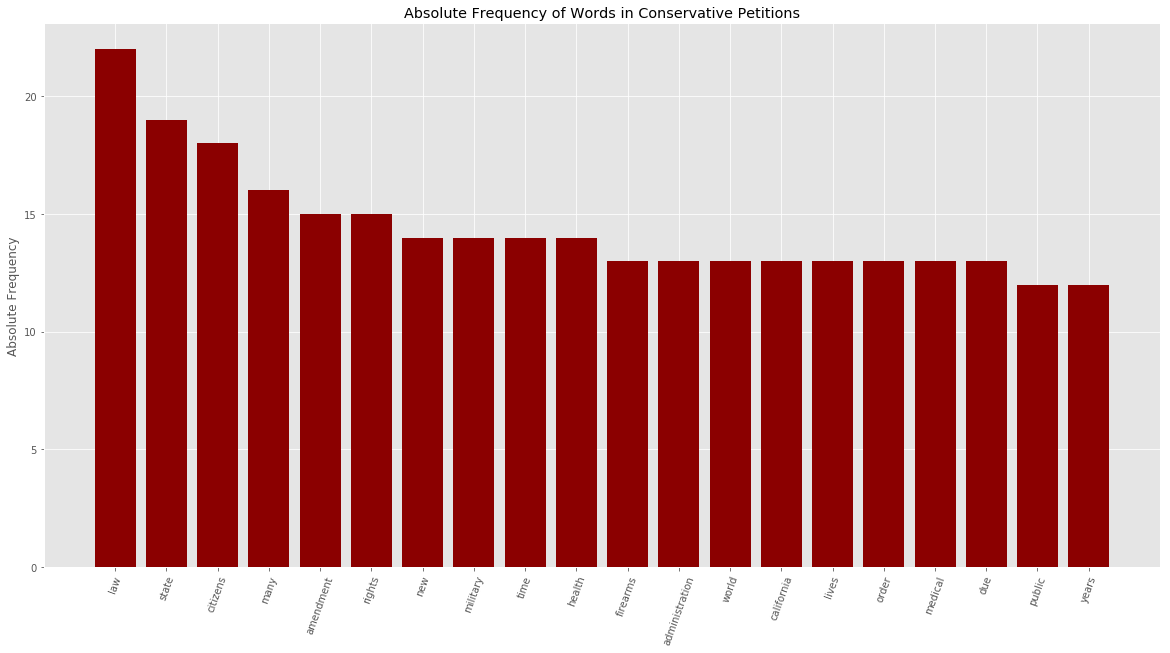

In [181]:
# CONSERVATIVE
conservative_blobs2 = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Conservative"]["new_blobs"]])
conservative_counts2 = Counter(conservative_blobs2.split())
conservative_counts2.most_common()[0:20]

df = pd.DataFrame.from_dict(conservative_counts2, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

# PLOTTING
plt.figure(figsize=(20,10))
plt.bar(word_indices, count, color="darkred")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Conservative Petitions")
    
plt.show()

<font color="navy">
## (6) Testing Vectorizer Code
Source: https://www.youtube.com/watch?v=AJVP96tAWxw

In [269]:
import random
pseudo_rando_nums = random.sample(range(0, len(blobs_df)), 180)
train = pseudo_rando_nums

In [270]:
# VECTORIZING TRAINING DATA
vectorizer = CountVectorizer(analyzer= "word",
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            max_features = 5000)
train_data_features = vectorizer.fit_transform(blobs_df["new_blobs"][train])
train_data_features = train_data_features.toarray()
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [271]:
# GENERATE OUR FOREST
forest = RandomForestClassifier(n_estimators = 100)
our_forest = forest.fit(train_data_features, blobs_df["ideology"][train])

In [272]:
# GET INDICES OF TEST DATA
test = set(range(len(blobs_df))) - set(train)
test = list(test)
print test

[258, 132, 133, 260, 193, 8, 140, 14, 143, 222, 152, 18, 147, 20, 24, 25, 234, 155, 29, 30, 261, 33, 163, 36, 165, 166, 167, 249, 41, 174, 221, 180, 177, 52, 53, 54, 250, 56, 57, 59, 60, 62, 245, 64, 65, 66, 67, 70, 71, 204, 203, 76, 77, 78, 79, 227, 212, 185, 216, 169, 90, 205, 93, 94, 223, 97, 226, 99, 101, 230, 106, 238, 111, 229, 114, 115, 117, 119, 148, 122, 252, 219, 127]


In [273]:
# VECTORIZING TEST DATA
test_data_features = vectorizer.transform(blobs_df["new_blobs"][test])
test_data_features = test_data_features.toarray()
test_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [274]:
# PREDICT
result = forest.predict(test_data_features)

In [275]:
pred_df = pd.DataFrame({"petition":blobs_df["title"][test], "true_ideol":blobs_df["ideology"][test], "pred_ideol":result})
pred_df = pred_df.reindex()

In [276]:
pred_df["correct"] = (pred_df["pred_ideol"] == pred_df["true_ideol"])

In [277]:
# ERROR RATE
len(pred_df[pred_df["correct"]==False])*(len(pred_df)**(-1))

0.49397590361445787

In [278]:
# CONSERVATIVE, LIBERAL, NEUTRAL
predicted_probs = forest.predict_proba(test_data_features)
# probs_df = pd.DataFrame(predicted_probs)
# probs_df.columns = ["conservative", "liberal", "neutral"]
# probs_df

In [279]:
conservative = [predicted_probs[x][0] for x in range(len(predicted_probs))]
liberal = [predicted_probs[x][1] for x in range(len(predicted_probs))]
neutral = [predicted_probs[x][2] for x in range(len(predicted_probs))]

In [280]:
pred_df["conservative"] = conservative
pred_df["liberal"] = liberal
pred_df["neutral"] = neutral
pred_df

,petition,pred_ideol,true_ideol,correct,conservative,liberal,neutral
258,repeal the hughes amendment,Liberal,Conservative,False,0.156000,0.814000,0.03
132,amend the moratorium on refugee immigration to...,Liberal,Liberal,True,0.200000,0.690000,0.11
133,"lyme disease epidemic: testing, diagnostics an...",Liberal,Neutral,False,0.160000,0.740000,0.10
260,donald trump: resign as president of the unit...,Liberal,Liberal,True,0.270000,0.490000,0.24
193,revoke the order forbidding health providers r...,Liberal,Liberal,True,0.220000,0.700000,0.08
8,exempt department of defense nonappropriated f...,Liberal,Neutral,False,0.240000,0.700000,0.06
140,immediately rescind january executive order s...,Liberal,Liberal,True,0.235000,0.675000,0.09
14,oppose the nomination of judge gorsuch for the...,Liberal,Liberal,True,0.170000,0.790000,0.04
143,"cancel executive order banning people of iran,...",Liberal,Liberal,True,0.270000,0.670000,0.06
222,restore the lgbt rights page on whitehouse.gov...,Liberal,Liberal,True,0.180000,0.550000,0.27


<font color="navy">
## (7) Bored, so Trying Some Random Stuff
Pulling some stuff off the web.

In [226]:
matloff = '''
Let me offer three obvious (to me, at least) facts:

No one, even the most extreme Republicans, wants to see people dying in the streets. The federal government does have a role, indeed a responsibility. It’s too big for the states, and even if the feds give them block grants, some states, say in the South, would adopt draconian policies.
Many people, especially the stereotypical Trump supporters, live paycheck to paycheck. Tax breaks, health savings accounts and the like are useless to this large group of people. It’s an insult to offer them such things, a let-them-eat-cake solution.
Obamacare was a bold step that filled a void that desperately needed to be filled. But it was built on various assumptions that apparently were shaky. It is not sustainable in its current form. Already some insurers have withdrawn from certain markets.
The Republicans now are making their own shaky assumptions, e.g. that a 30% penalty, for those who forego insurance but then suddenly need it, is the right “price” for not doing their part to support the system. Really? Why shouldn’t it be 5% or 50%, say? No one knows.
'''

robert_reich = '''
Trump and his White House don’t argue on the merits. They attack the credibility of the institutions that come up with facts and arguments they don’t like. 

They even do it preemptively. Last week, White House press secretary Sean Spicer warned that the nonpartisan Congressional Budget Office couldn’t be trusted to come up with accurate numbers about the costs and coverage of the Republican’s replacement for the Affordable Care Act.

“If you’re looking at the CBO for accuracy, you’re looking in the wrong place,” he said.

So what’s the right place? The Oval Office? 

Bear in mind the director of the CBO is a Republican economist and former George W. Bush administration official who was chosen for his position by the Republican Congress in 2015. 

No matter. The White House is worried about what the CBO will say about Trumpcare, so it throws the CBO under the bus before the bus arrives. 

Trump couldn’t care less about the long-term consequences, but the rest of us should. For more than four decades the U.S. budget process has depended on the CBO’s analyses and forecasts. The office has gained a reputation for honesty and reliability under both Republican and Democratic appointees. Now, it’s tainted. 
'''
nate_silver = '''
This is not to say the election was a toss-up in mid-October, which was one of the high-water marks of the campaign for Clinton. But while a Trump win was unlikely, it should hardly have been unthinkable.1 And yet the Times, famous for its “to be sure” equivocations,2 wasn’t even contemplating the possibility of a Trump victory.3
It’s hard to reread this coverage without recalling Sean Trende’s essay on “unthinkability bias,” which he wrote in the wake of the Brexit vote. Just as was the case in the U.S. presidential election, voting on the referendum had split strongly along class, education and regional lines, with voters outside of London and without advanced degrees being much more likely to vote to leave the EU. The reporters covering the Brexit campaign, on the other hand, were disproportionately well-educated and principally based in London. They tended to read ambiguous signs — anything from polls to the musings of taxi drivers — as portending a Remain win, and many of them never really processed the idea that Britain could vote to leave the EU until it actually happened.

So did journalists in Washington and London make the apocryphal Pauline Kael mistake, refusing to believe that Trump or Brexit could win because nobody they knew was voting for them? That’s not quite what Trende was arguing. Instead, it’s that political experts4 aren’t a very diverse group and tend to place a lot of faith in the opinions of other experts and other members of the political establishment. Once a consensus view is established, it tends to reinforce itself until and unless there’s very compelling evidence for the contrary position. Social media, especially Twitter, can amplify the groupthink further. It can be an echo chamber.

I recently reread James Surowiecki’s book “The Wisdom of Crowds” which, despite its name, spends as much time contemplating the shortcomings of such wisdom as it does celebrating its successes. Surowiecki argues5 that crowds usually make good predictions when they satisfy these four conditions:

Diversity of opinion. “Each person should have private information, even if it’s just an eccentric interpretation of the known facts.”
Independence. “People’s opinions are not determined by the opinions of those around them.”
Decentralization. “People are able to specialize and draw on local knowledge.”
Aggregation. “Some mechanism exists for turning private judgments into a collective decision.”
Political journalism scores highly on the fourth condition, aggregation. While Surowiecki usually has something like a financial or betting market in mind when he refers to “aggregation,” the broader idea is that there’s some way for individuals to exchange their opinions instead of keeping them to themselves. And my gosh, do political journalists have a lot of ways to share their opinions with one another, whether through their columns, at major events such as the political conventions or, especially, through Twitter.

But those other three conditions? Political journalism fails miserably along those dimensions.
'''
abe_lincoln = '''Fourscore and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal.

Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this.

But, in a larger sense, we can not dedicate-we can not consecrate-we can not hallow-this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us-that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion-that we here highly resolve that these dead shall not have died in vain-that this nation, under God, shall have a new birth of freedom-and that government of the people, by the people, for the people shall not perish from the earth.'''

In [227]:
new_text = [matloff, robert_reich, nate_silver, abe_lincoln]
new_text_tokens = [cleanUpText(str(x), new_stops) for x in new_text]

/Users/EDIE/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [228]:
new_text_blobs = [" ".join(x) for x in new_text_tokens]

In [229]:
new_text_blobs

['let offer three obvious least factsno one even extreme republicans wants see dying streets federal role indeed responsibility it\xe2\x80\x99s big even feds give block grants say south adopt draconian policiesmany especially stereotypical supporters live paycheck paycheck tax breaks health savings accounts like useless large group it\xe2\x80\x99s insult offer things letthemeatcake solutionobamacare bold step filled void desperately needed filled built various assumptions apparently shaky sustainable current form already insurers withdrawn certain marketsthe republicans making shaky assumptions eg penalty forego insurance suddenly right \xe2\x80\x9cprice\xe2\x80\x9d part support system really shouldn\xe2\x80\x99t say one knows',
 'don\xe2\x80\x99t argue merits attack credibility institutions come facts arguments don\xe2\x80\x99t like even preemptively last week press secretary sean spicer warned nonpartisan congressional budget office couldn\xe2\x80\x99t trusted come accurate numbers c

In [230]:
# VECTORIZING NEW TEXT DATA
new_text__data_features = vectorizer.transform(new_text_blobs)
new_text__data_features = new_text__data_features.toarray()
new_text__data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [231]:
# PREDICT NEW TEXT DATA
result = forest.predict(new_text__data_features)

In [232]:
result

array(['Conservative', 'Liberal', 'Liberal', 'Liberal'], dtype=object)